#  CIFAR10 photo classification using Keras

The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning. The problem consists on classifying a dataset containing 60000 images (32x32 pixels) into 10 different categories. We are going to use 50000 images for the training and 10000 images for the test.


<img src="https://miro.medium.com/max/944/1*6XQqOifwnmplS22zCRRVaw.png" width="500">

We start by importing the packages we are going to need

In [1]:
import os
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image as k_image
import tensorflow as tf
K.set_image_dim_ordering('th')

## plotting the architecture
from tensorflow.python.keras.utils import plot_model
import matplotlib as mpl
mpl.use('Agg')

from IPython.display import Image

print("[INFO] TensorFlow ver: ", tf.__version__)
print("[INFO] Image format : ", K.image_data_format())

Using TensorFlow backend.


[INFO] TensorFlow ver:  1.10.0
[INFO] Image format :  channels_first


Let's define a list with the classification labels

In [2]:
labels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
outputpath = "."

## Model Training

Let's now load the dataset, define the model and train

In [3]:
K.clear_session()

#Training parameters
#epochs = 10
#lrate = 0.01
#decay = lrate/epochs

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check input shape
print("[INFO] Input shape: ", X_train.shape[1:])

# Transform to hot vectors
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print("[INFO] We are running on %i classes" % num_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(3, 32, 32)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#Define the optimizer
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# plot the neural network architecture
plot_model(model, to_file="model_architecture.png")

[INFO] Input shape:  (3, 32, 32)
[INFO] We are running on 10 classes
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
conv2d_

### show the saved neural network architecture

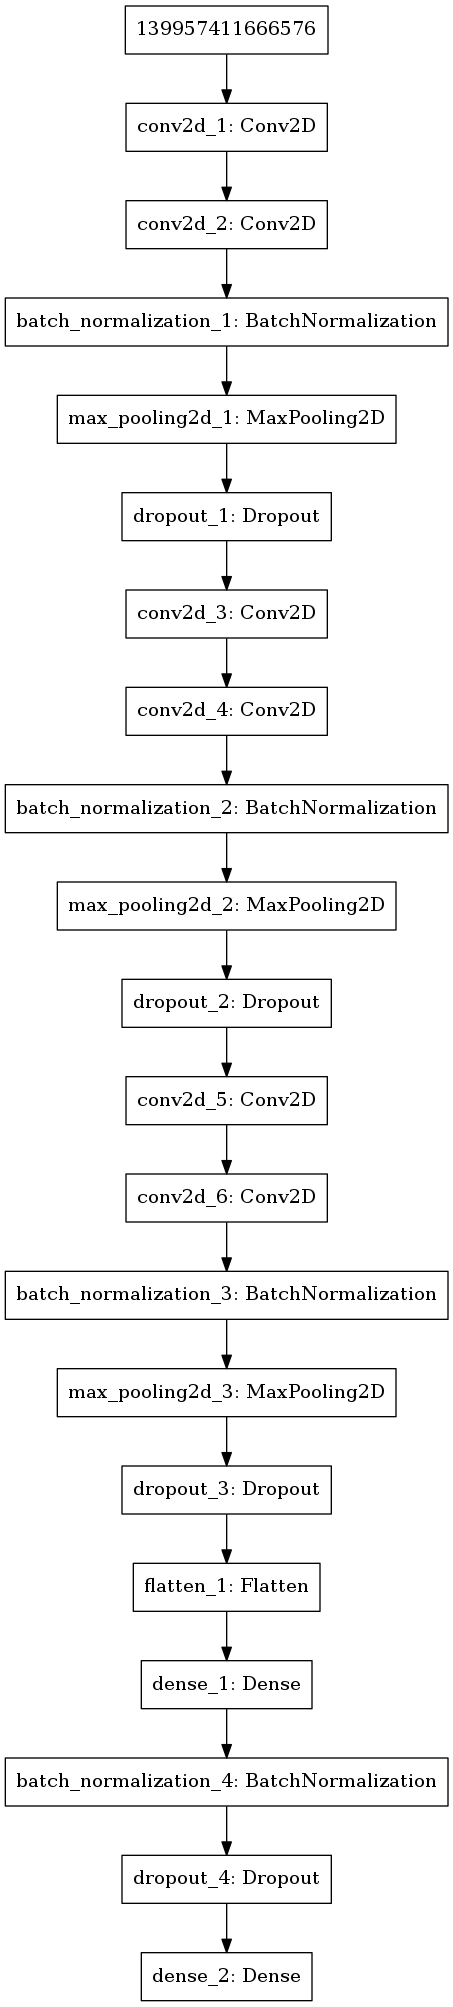

In [4]:
Image("model_architecture.png")

## Now run training and store weights

In [5]:
epochs = 5
weights_path = os.path.join(outputpath, "model.h5")
# check if weights file already exists, load it to continue training
if os.path.exists(weights_path):
    model.load_weights(weights_path)
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=64)

#Evaluate the model on the test dataset
scores = model.evaluate(X_test, y_test, verbose=10)
print("Accuracy: %.2f%%" % (scores[1]*100))

#Save the model
model.save(weights_path)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 33s 658us/step - loss: 1.5578 - acc: 0.4401 - val_loss: 1.1472 - val_acc: 0.5850
Epoch 2/5
50000/50000 [==============================] - 29s 576us/step - loss: 1.0222 - acc: 0.6386 - val_loss: 0.9500 - val_acc: 0.6658
Epoch 3/5
50000/50000 [==============================] - 29s 576us/step - loss: 0.8327 - acc: 0.7082 - val_loss: 0.7392 - val_acc: 0.7377
Epoch 4/5
50000/50000 [==============================] - 29s 574us/step - loss: 0.7244 - acc: 0.7455 - val_loss: 0.6637 - val_acc: 0.7683
Epoch 5/5
50000/50000 [==============================] - 29s 572us/step - loss: 0.6426 - acc: 0.7753 - val_loss: 0.6113 - val_acc: 0.7899
Accuracy: 78.99%


## Prediction

Let's now predict on some image using the model that we have just trained

In [9]:
K.clear_session()

#We load the model we have just trained
model=load_model(os.path.join(outputpath, "model.h5"))

#load local image
img = k_image.load_img('brittany.jpg', target_size=(32,32))
image = k_image.img_to_array(img) / 255.
#print("image shape:", image.shape)

#Expand the dimensions of the image to match the network architecture
#image = numpy.expand_dims(image, axis=0)
if K.image_data_format() == 'channels_first':
    image = image.reshape((1, 3, 32, 32))
else:
    image = image.reshape((1, 32, 32, 3))
#print("image shape:", image.shape)


predicted_vector = model.predict(image)
# return 5 best predictions
idxs = numpy.argsort(predicted_vector[0])[::-1][:5] 
probs_best = []
print("Top 5 predictions:")
for i in idxs:
    print("{0:10s} :  {1:5.4f}".format(labels[i], predicted_vector[0][i]))

#Print the prediction
label_best = labels[idxs[0]]
message= "The image is a " + label_best
if label_best=="airplane" or label_best=="automobile":
    message= "The image is an " + label_best

print()
print(message)

Top 5 predictions:
frog       :  0.3784
dog        :  0.2997
bird       :  0.1898
cat        :  0.0636
airplane   :  0.0158

The image is a frog
